<a href="https://colab.research.google.com/github/akshatamadavi/data_mining/blob/main/autogluon/beginner_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoMM for Text - Quick Start

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/autogluon/autogluon/blob/stable/docs/tutorials/multimodal/text_prediction/beginner_text.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/autogluon/autogluon/blob/stable/docs/tutorials/multimodal/text_prediction/beginner_text.ipynb)



`MultiModalPredictor` can solve problems where the data are either image, text, numerical values, or categorical features.
To get started, we first demonstrate how to use it to solve problems that only contain text. We pick two classical NLP problems for the purpose of demonstration:

- [Sentiment Analysis](https://en.wikipedia.org/wiki/Sentiment_analysis)
- [Sentence Similarity](https://arxiv.org/abs/1910.03940)

Here, we format the NLP datasets as data tables where
the feature columns contain text fields and the label column contain numerical (regression) / categorical (classification) values.
Each row in the table corresponds to one training sample.

In [1]:
!pip install autogluon.multimodal


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [2]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
np.random.seed(123)

## Sentiment Analysis Task

First, we consider the Stanford Sentiment Treebank ([SST](https://nlp.stanford.edu/sentiment/)) dataset, which consists of movie reviews and their associated sentiment.
Given a new movie review, the goal is to predict the sentiment reflected in the text (in this case a **binary classification**, where reviews are
labeled as 1 if they convey a positive opinion and labeled as 0 otherwise). Let's first load and look at the data,
noting the labels are stored in a column called **label**.

In [3]:
from autogluon.core.utils.loaders import load_pd
train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/train.parquet')
test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sst/dev.parquet')
subsample_size = 1000  # subsample data for faster demo, try setting this to larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head(10)

,sentence,label
43787,very pleasing at its best moments,1
16159,", american chai is enough to make you put away...",0
59015,too much like an infomercial for ram dass 's l...,0
5108,a stirring visual sequence,1
67052,cool visual backmasking,1
35938,hard ground,0
49879,"the striking , quietly vulnerable personality ...",1
51591,pan nalin 's exposition is beautiful and myste...,1
56780,wonderfully loopy,1
28518,"most beautiful , evocative",1


Above the data happen to be stored in the [Parquet](https://databricks.com/glossary/what-is-parquet) format, but you can also directly `load()` data from a [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) file or other equivalent formats.
While here we load files from [AWS S3 cloud storage](https://docs.aws.amazon.com/AmazonS3/latest/dev/Welcome.html), these could instead be local files on your machine.
After loading, `train_data` is simply a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html),
where each row represents a different training example.

### Training

To ensure this tutorial runs quickly, we simply call `fit()` with a subset of 1000 training examples and limit its runtime to approximately 1 minute.
To achieve reasonable performance in your applications, you are recommended to set much longer `time_limit` (eg. 1 hour), or do not specify `time_limit` at all (`time_limit=None`).

In [4]:
from autogluon.multimodal import MultiModalPredictor
import uuid
model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
predictor = MultiModalPredictor(label='label', eval_metric='acc', path=model_path)
predictor.fit(train_data, time_limit=180)

=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          12
Pytorch Version:    2.7.1+cu126
CUDA Version:       12.6
GPU Count:          1
Memory Avail:       163.65 GB / 167.05 GB (98.0%)
Disk Space Avail:   190.78 GB / 235.68 GB (80.9%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [np.int64(1), np.int64(0)]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /content/tmp

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

GPU Count: 1
GPU Count to be Used: 1

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name              | Type                         | Params | Mode 
---------------------------------------------------------------------------
0 | model             | HFAutoModelForTextPrediction | 108 M  | train
1 | validation_metric | MulticlassAccuracy           | 0      | train
2 | loss_func         | CrossEntropyLoss             | 0      | train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 3: 'val_accuracy' reached 0.51500 (best 0.51500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=0-step=3.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 7: 'val_accuracy' reached 0.58500 (best 0.58500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=0-step=7.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 10: 'val_accuracy' reached 0.64500 (best 0.64500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=1-step=10.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 14: 'val_accuracy' reached 0.74000 (best 0.74000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=1-step=14.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 17: 'val_accuracy' reached 0.84000 (best 0.84000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=2-step=17.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 21: 'val_accuracy' reached 0.79500 (best 0.84000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=2-step=21.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 24: 'val_accuracy' reached 0.88500 (best 0.88500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=3-step=24.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 28: 'val_accuracy' reached 0.88000 (best 0.88500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=3-step=28.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 31: 'val_accuracy' reached 0.86500 (best 0.88500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=4-step=31.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 35: 'val_accuracy' reached 0.88500 (best 0.88500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=4-step=35.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 38: 'val_accuracy' reached 0.89000 (best 0.89000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=5-step=38.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 42: 'val_accuracy' reached 0.89000 (best 0.89000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=5-step=42.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 45: 'val_accuracy' reached 0.90000 (best 0.90000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=6-step=45.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 49: 'val_accuracy' reached 0.90000 (best 0.90000), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=6-step=49.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 52: 'val_accuracy' reached 0.90500 (best 0.90500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=7-step=52.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 56: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 59: 'val_accuracy' reached 0.90500 (best 0.90500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=8-step=59.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 63: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 66: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 70: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 73: 'val_accuracy' reached 0.90500 (best 0.90500), saving model to '/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/epoch=10-step=73.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:03:06. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

Start to fuse 3 checkpoints via the greedy soup algorithm.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




Above we specify that: the column named **label** contains the label values to predict, AutoGluon should optimize its predictions for the accuracy evaluation metric,
trained models should be saved in the **automm_sst** folder, and training should run for around 60 seconds.

### Evaluation

After training, we can easily evaluate our predictor on separate test data formatted similarly to our training data.

In [5]:
test_score = predictor.evaluate(test_data)
print(test_score)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

{'accuracy': 0.8944954128440367}


By default, `evaluate()` will report the evaluation metric previously specified, which is `accuracy` in our example. You may also specify additional metrics, e.g. F1 score, when calling evaluate.

In [6]:
test_score = predictor.evaluate(test_data, metrics=['acc', 'f1'])
print(test_score)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

{'acc': 0.8944954128440367, 'f1': 0.9}


### Prediction

And you can easily obtain predictions from these models by calling `predictor.predict()`.

In [7]:
sentence1 = "it's a charming and often affecting journey."
sentence2 = "It's slow, very, very, very slow."
predictions = predictor.predict({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Sentiment":', predictions[0])
print('"Sentence":', sentence2, '"Predicted Sentiment":', predictions[1])

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Sentiment": 1
"Sentence": It's slow, very, very, very slow. "Predicted Sentiment": 0


For classification tasks, you can ask for predicted class-probabilities instead of predicted classes.

In [8]:
probs = predictor.predict_proba({'sentence': [sentence1, sentence2]})
print('"Sentence":', sentence1, '"Predicted Class-Probabilities":', probs[0])
print('"Sentence":', sentence2, '"Predicted Class-Probabilities":', probs[1])

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

"Sentence": it's a charming and often affecting journey. "Predicted Class-Probabilities": [9.134450e-05 9.999087e-01]
"Sentence": It's slow, very, very, very slow. "Predicted Class-Probabilities": [9.9948573e-01 5.1426078e-04]


We can just as easily produce predictions over an entire dataset.

In [9]:
test_predictions = predictor.predict(test_data)
test_predictions.head()

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

,label
0,1
1,0
2,1
3,1
4,0


### Save and Load

The trained predictor is automatically saved at the end of `fit()`, and you can easily reload it.

```{warning}

`MultiModalPredictor.load()` uses `pickle` module implicitly, which is known to be insecure. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling. Never load data that could have come from an untrusted source, or that could have been tampered with. **Only load data you trust.**

```

In [10]:
loaded_predictor = MultiModalPredictor.load(model_path)
loaded_predictor.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/c58c5db066d34a1bbbefedf68f41f71d-automm_sst/model.ckpt
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[9.1344496e-05, 9.9990869e-01],
       [9.9948573e-01, 5.1426078e-04]], dtype=float32)

You can also save the predictor to any location by calling `.save()`.

In [11]:
new_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sst"
loaded_predictor.save(new_model_path)
loaded_predictor2 = MultiModalPredictor.load(new_model_path)
loaded_predictor2.predict_proba({'sentence': [sentence1, sentence2]})

Load pretrained checkpoint: /content/tmp/a808bc2d495b48bdaa3846be6935624c-automm_sst/model.ckpt
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

array([[9.1344496e-05, 9.9990869e-01],
       [9.9948573e-01, 5.1426078e-04]], dtype=float32)

### Extract Embeddings



You can also use a trained predictor to extract embeddings that maps each row of the data table to an embedding vector extracted from intermediate neural network representations of the row.

In [12]:
embeddings = predictor.extract_embedding(test_data)
print(embeddings.shape)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

(872, 768)


Here, we use TSNE to visualize these extracted embeddings. We can see that there are two clusters corresponding to our two labels, since this network has been trained to discriminate between these labels.

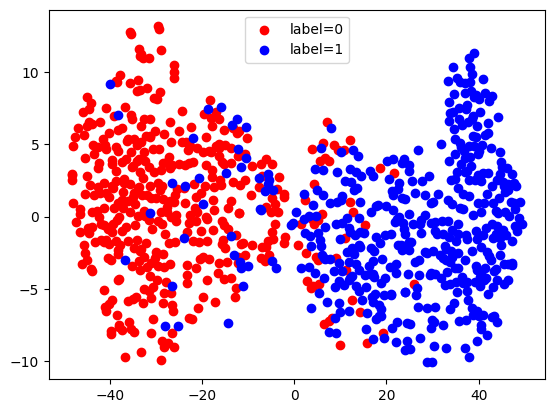

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, random_state=123).fit_transform(embeddings)
for val, color in [(0, 'red'), (1, 'blue')]:
    idx = (test_data['label'].to_numpy() == val).nonzero()
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], c=color, label=f'label={val}')
plt.legend(loc='best')

## Sentence Similarity Task

Next, let's use MultiModalPredictor to train a model for evaluating how semantically similar two sentences are.
We use the [Semantic Textual Similarity Benchmark](https://paperswithcode.com/dataset/sts-benchmark) dataset for illustration.

In [14]:
sts_train_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet')[['sentence1', 'sentence2', 'score']]
sts_test_data = load_pd.load('https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet')[['sentence1', 'sentence2', 'score']]
sts_train_data.head(10)

Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/train.parquet | Columns = 4 / 4 | Rows = 5749 -> 5749
Loaded data from: https://autogluon-text.s3-accelerate.amazonaws.com/glue/sts/dev.parquet | Columns = 4 / 4 | Rows = 1500 -> 1500


,sentence1,sentence2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25
5,Some men are fighting.,Two men are fighting.,4.25
6,A man is smoking.,A man is skating.,0.50
7,The man is playing the piano.,The man is playing the guitar.,1.60
8,A man is playing on a guitar and singing.,A woman is playing an acoustic guitar and sing...,2.20
9,A person is throwing a cat on to the ceiling.,A person throws a cat on the ceiling.,5.00


In this data, the column named **score** contains numerical values (which we'd like to predict) that are human-annotated similarity scores for each given pair of sentences.

In [15]:
print('Min score=', min(sts_train_data['score']), ', Max score=', max(sts_train_data['score']))

Min score= 0.0 , Max score= 5.0


Let's train a regression model to predict these scores. Note that we only need to specify the label column and AutoGluon automatically determines the type of prediction problem and an appropriate loss function. Once again, you should increase the short `time_limit` below to obtain reasonable performance in your own applications.

In [16]:
sts_model_path = f"./tmp/{uuid.uuid4().hex}-automm_sts"
predictor_sts = MultiModalPredictor(label='score', path=sts_model_path)
predictor_sts.fit(sts_train_data, time_limit=60)

=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          12
Pytorch Version:    2.7.1+cu126
CUDA Version:       12.6
GPU Count:          1
Memory Avail:       158.59 GB / 167.05 GB (94.9%)
Disk Space Avail:   189.09 GB / 235.68 GB (80.2%)
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and label-values can't be converted to int).
	Label info (max, min, mean, stddev): (5.0, 0.0, 2.701, 1.4644)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have ins

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 20: 'val_rmse' reached 0.65183 (best 0.65183), saving model to '/content/tmp/47663b74df584cf5b1f4bdcdd8dbde4b-automm_sts/epoch=0-step=20.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 40: 'val_rmse' reached 0.51591 (best 0.51591), saving model to '/content/tmp/47663b74df584cf5b1f4bdcdd8dbde4b-automm_sts/epoch=0-step=40.ckpt' as top 3
INFO: Time limit reached. Elapsed time is 0:01:00. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 57: 'val_rmse' reached 0.51303 (best 0.51303), saving model to '/content/tmp/47663b74df584cf5b1f4bdcdd8dbde4b-automm_sts/epoch=1-step=57.ckpt' as top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.
INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/tmp/47663b74df584cf5b1f4bdcdd8dbde4b-automm_sts")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




We again evaluate our trained model's performance on separate test data. Below we choose to compute the following metrics: RMSE, Pearson Correlation, and Spearman Correlation.

In [17]:
test_score = predictor_sts.evaluate(sts_test_data, metrics=['rmse', 'pearsonr', 'spearmanr'])
print('RMSE = {:.2f}'.format(test_score['rmse']))
print('PEARSONR = {:.4f}'.format(test_score['pearsonr']))
print('SPEARMANR = {:.4f}'.format(test_score['spearmanr']))

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

RMSE = 0.92
PEARSONR = 0.8024
SPEARMANR = 0.8028


Let's use our model to predict the similarity score between a few sentences.

In [18]:
sentences = ['The child is riding a horse.',
             'The young boy is riding a horse.',
             'The young man is riding a horse.',
             'The young man is riding a bicycle.']

score1 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[1]]}, as_pandas=False)

score2 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[2]]}, as_pandas=False)

score3 = predictor_sts.predict({'sentence1': [sentences[0]],
                                'sentence2': [sentences[3]]}, as_pandas=False)
print(score1, score2, score3)

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO: 💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.


Predicting: |          | 0/? [00:00<?, ?it/s]

4.3716683 3.5272708 1.1896528


Although the `MultiModalPredictor` currently supports classification and regression tasks, it can directly be used for
many NLP tasks if you properly format them into a data table. Note that there can be many text columns in this data table.
Refer to the [MultiModalPredictor documentation](../../../../api/autogluon.multimodal.MultiModalPredictor.fit.rst) to see all available methods/options.

Unlike `TabularPredictor` which trains/ensembles different types of models,
`MultiModalPredictor` focuses on selecting and finetuning deep learning based models.
Internally, it integrates with [timm](https://github.com/rwightman/pytorch-image-models) , [huggingface/transformers](https://github.com/huggingface/transformers),
[openai/clip](https://github.com/openai/CLIP) as the model zoo.

## Other Examples

You may go to [AutoMM Examples](https://github.com/autogluon/autogluon/tree/master/examples/automm) to explore other examples about AutoMM.

## Customization
To learn how to customize AutoMM, please refer to [Customize AutoMM](../advanced_topics/customization.ipynb).